In [101]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [102]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [103]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [104]:
# create engine to hawaii.sqlite
database_path = "../Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")



In [105]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

#Session Create

session = Session(engine)


# reflect the tables
Measurement = Base.classes.measurement
Station = Base.classes.station

/var/folders/1y/lrsrz62n53qfv18krp557w8w0000gn/T/ipykernel_17503/1453261722.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [106]:
# View all of the classes that automap found
print(Base.classes.keys())

['station', 'measurement']


In [107]:

# Save references to each table
session = Session(engine)
results = session.query(Measurement.date, Measurement.prcp).all()

results

session = Session(engine)
results = session.query(Station.station, Station.name).all()

results

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [108]:
# Create our session (link) from Python to the DB
# Query the database
results = session.query(Measurement.date, Measurement.prcp).all()
results

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

# Exploratory Precipitation Analysis

In [109]:

# Find the most recent date in the data set
most_recent_date = session.query(func.max(Measurement.date)).scalar()
# Print the result
print(most_recent_date)


2017-08-23


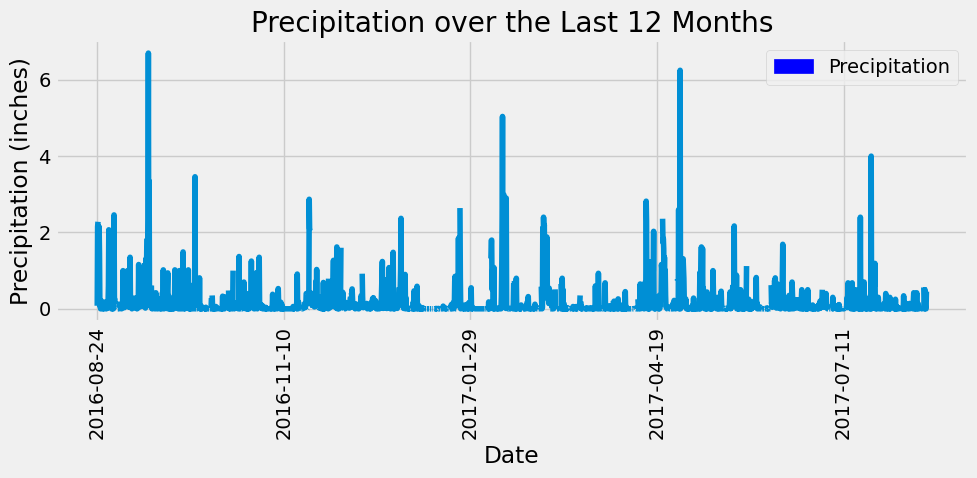

In [110]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(func.max(Measurement.date)).scalar()

# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])


# Sort the dataframe by date
df.set_index('date', inplace=True)
df = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(10,5))
df.plot(ax=ax, rot=90, legend=False)
ax.set(title="Precipitation over the Last 12 Months", xlabel="Date", ylabel="Precipitation (inches)")

# Add patches (example: adding a red patch to the legend)
blue_patch = mpatches.Patch(color='blue', label='Precipitation')
ax.legend(handles=[blue_patch])

plt.tight_layout()

plt.savefig('../output_images/Precipitation_figure.png')
plt.show()



In [111]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_summary = df['precipitation'].describe()
print(precipitation_summary)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [112]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(func.count(Station.station.distinct())).scalar()
print(f'There are {num_stations} stations in the dataset.')

There are 9 stations in the dataset.


In [113]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
from sqlalchemy import desc

most_active_stations = session.query(Measurement.station, func.count(Measurement.station))\
                    .filter(Measurement.station == Station.station)\
                    .group_by(Measurement.station)\
                    .order_by(desc(func.count(Measurement.station)))\
                    .all()

for station, count in most_active_stations:
    print(f'Station {station} has {count} observations.')

Station USC00519281 has 2772 observations.
Station USC00519397 has 2724 observations.
Station USC00513117 has 2709 observations.
Station USC00519523 has 2669 observations.
Station USC00516128 has 2612 observations.
Station USC00514830 has 2202 observations.
Station USC00511918 has 1979 observations.
Station USC00517948 has 1372 observations.
Station USC00518838 has 511 observations.


In [114]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]

temp_summary = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
                    .filter(Measurement.station == most_active_station)\
                    .all()
for tmin, tmax, tavg in temp_summary:
    print(f'For station {most_active_station}:')
    print(f' - Lowest temperature observed: {tmin} degrees Fahrenheit')
    print(f' - Highest temperature observed: {tmax} degrees Fahrenheit')
    print(f' - Average temperature observed: {tavg:.2f} degrees Fahrenheit')

For station USC00519281:
 - Lowest temperature observed: 54.0 degrees Fahrenheit
 - Highest temperature observed: 85.0 degrees Fahrenheit
 - Average temperature observed: 71.66 degrees Fahrenheit


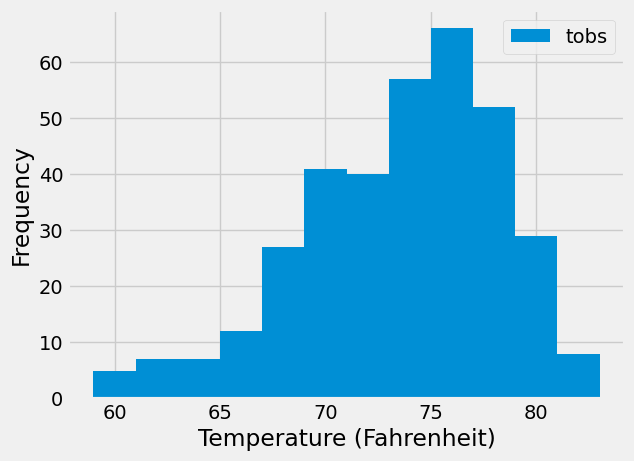

In [115]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

import datetime as dt
from dateutil.relativedelta import relativedelta

# Calculate the date one year from the last date in the dataset
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
latest_date = dt.datetime.strptime(latest_date, '%Y-%m-%d')
one_year_ago = latest_date - relativedelta(months=12)

# Query the last 12 months of temperature observation data for the most active station
temp_data = session.query(Measurement.tobs)\
            .filter(Measurement.station == most_active_station)\
            .filter(Measurement.date >= one_year_ago)\
            .all()
temperatures = [t[0] for t in temp_data]

# Plot the results as a histogram
plt.hist(temperatures, bins=12, label='tobs')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('../output_images/temperature_figure.png')
plt.show()

# Close Session

In [116]:
# Close Session
session.close()